In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [2]:
# Cleaned Dataset 
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("processed.cleveland.data",
                 names=columns, na_values="?")

df = df.dropna()

# Convert target to binary (0 = no disease, 1 = disease)
y = (df["target"] > 0).astype(int)
X = df.drop("target", axis=1)

In [3]:
# Train and test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (237, 13)
Test set shape: (60, 13)


In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

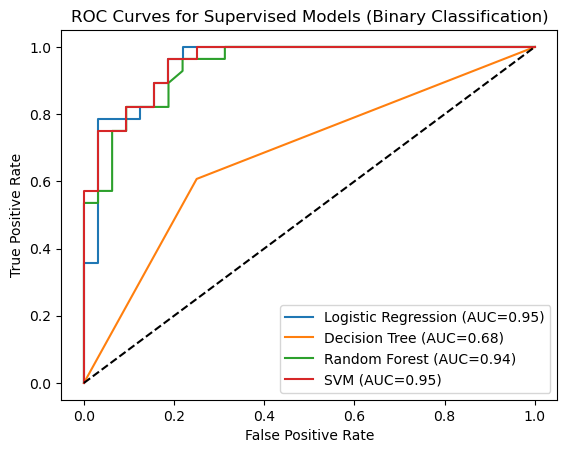


Model Performance Comparison:

Logistic Regression:
  Accuracy: 0.8333
  Precision: 0.8462
  Recall: 0.7857
  F1-score: 0.8148
  AUC: 0.9498

Decision Tree:
  Accuracy: 0.6833
  Precision: 0.6800
  Recall: 0.6071
  F1-score: 0.6415
  AUC: 0.6786

Random Forest:
  Accuracy: 0.8667
  Precision: 0.8846
  Recall: 0.8214
  F1-score: 0.8519
  AUC: 0.9414

SVM:
  Accuracy: 0.8500
  Precision: 0.8800
  Recall: 0.7857
  F1-score: 0.8302
  AUC: 0.9542


In [6]:
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc_val = accuracy_score(y_test, y_pred)
    prec_val = precision_score(y_test, y_pred)
    rec_val = recall_score(y_test, y_pred)
    f1_val = f1_score(y_test, y_pred)
    auc_val = roc_auc_score(y_test, y_prob)

    results[name] = {
        "Accuracy": acc_val,
        "Precision": prec_val,
        "Recall": rec_val,
        "F1-score": f1_val,
        "AUC": auc_val
    }

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.2f})")

# Plot ROC Curves
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Supervised Models (Binary Classification)")
plt.legend()
plt.show()

# Print Results
print("\nModel Performance Comparison:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

In [7]:
# 5. Results Table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])
print("\nModel Performance:")
print(results_df)


Model Performance:
Empty DataFrame
Columns: [Model, Accuracy, Precision, Recall, F1-score, AUC]
Index: []


C:\Users\EELU\AppData\Local\Temp\ipykernel_21744\458566041.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


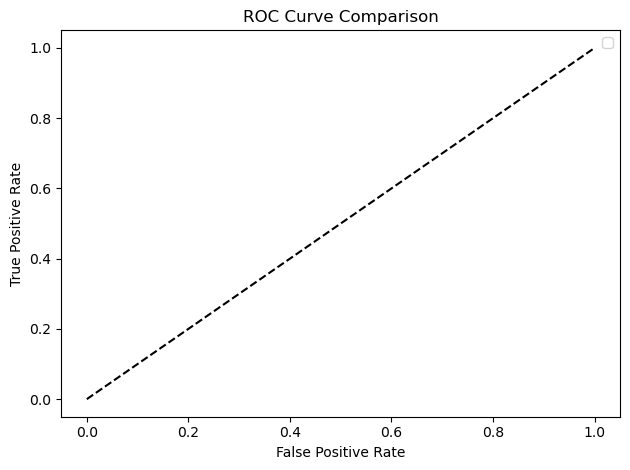

In [8]:
# 6. ROC Curve Plot
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curves.png")
plt.show()